# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [4]:
data = pd.read_csv('./train.csv')
data_origin = data.copy()

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

TotalSpent нужно преобразовать в float64

In [7]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

In [8]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропущенные значения заполним медианой

In [9]:
data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### 1.1 Посмотрим распределение признаков по колонкам

Числовые признаки

In [10]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2289.889086,0.159409,0.262022
std,24.550326,30.176464,2267.371263,0.366092,0.439776
min,0.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.462500,401.587500,0.000000,0.000000
50%,29.000000,70.400000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


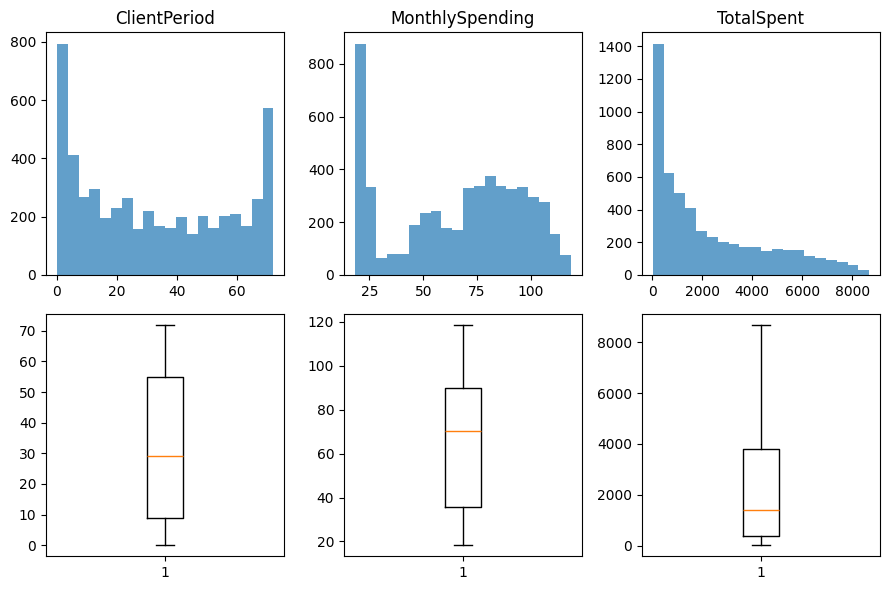

In [11]:
fig, axes = plt.subplots(2, len(num_cols), figsize=(3 * len(num_cols), 6))


axes = np.atleast_2d(axes)

for i, col in enumerate(num_cols):
    
    axes[0, i].hist(data[col], bins=20, alpha=0.7)
    axes[0, i].set_title(col)

    axes[1, i].boxplot(data[col])

plt.tight_layout()
plt.show()


1. ClientPeriod

Клиенты делятся в основном на 2 сегмента:
- кто недавно подрубился (подвержены оттоку)
- кто давно подрубился

По бокс плоту в целом все равномерно

2. MonthlySpending и TotalSpent
- те кто редко проводит время, очевидно, подвержены оттоку
- по бокс плоту можно увидеть что таких немало

### 1.2 Категориальные признаки

Посчитаем количество для каждого значения каждого признака

In [12]:
for col in cat_cols:
    print(data[col].value_counts(), end="\n\n")

Sex
Male      2655
Female    2627
Name: count, dtype: int64

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

HasPartner
No     2705
Yes    2577
Name: count, dtype: int64

HasChild
No     3676
Yes    1606
Name: count, dtype: int64

HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64

HasTechSupportAccess
No                     2604
Yes         

Диаграмму


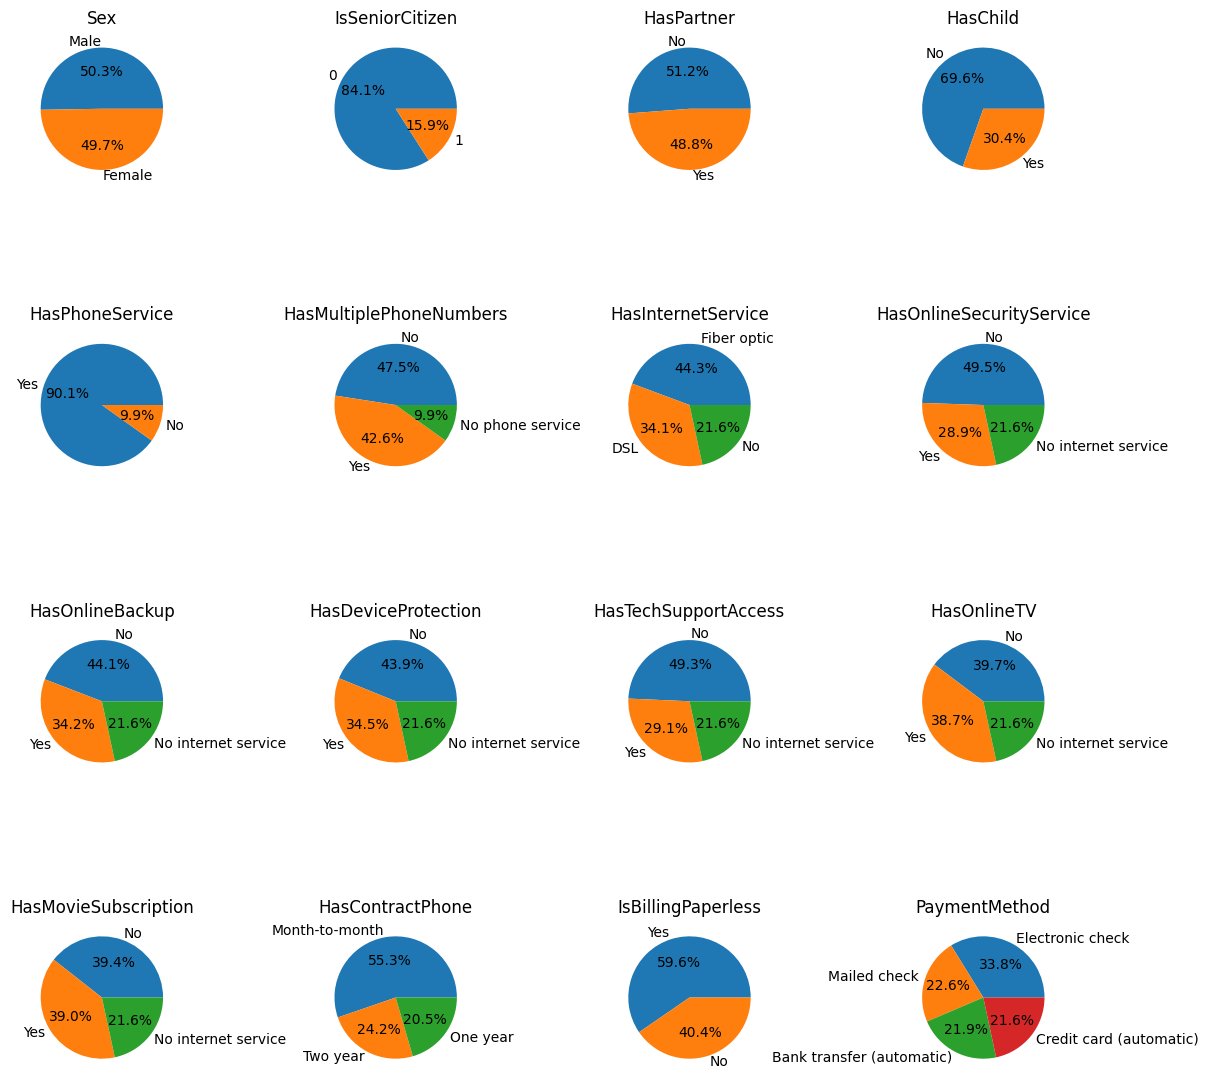

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for col, ax in zip(cat_cols, axes.ravel()):
    ax.set_title(col)
    val_counts = data[col].value_counts()
    ax.pie(val_counts, labels=val_counts.index, autopct="%1.1f%%")

plt.tight_layout()
plt.show()

### Предобработка данных

#### Бинарные категориальные признаки

- HasPartner, HasChild, HasPhoneService: No/Yes $\rightarrow$ 0 / 1
- Male / Female $\rightarrow$ 0 / 1

In [14]:
binary_cols = ['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless', 'Sex']
# data[['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']] = data[['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']].replace({'No': 0, 'Yes' : 1})
# data['Sex'] = data['Sex'].replace({'Male': 0, 'Female': 1})
for col in binary_cols:
    col_names = data[col].dropna().unique()
    if len(col_names) == 2:
        data[col] = data[col].replace({col_names[0]: 0, col_names[1] : 1})
        
data[['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sex                 5282 non-null   int64
 1   HasPartner          5282 non-null   int64
 2   HasChild            5282 non-null   int64
 3   HasPhoneService     5282 non-null   int64
 4   IsBillingPaperless  5282 non-null   int64
dtypes: int64(5)
memory usage: 206.5 KB


C:\Users\MSI\AppData\Local\Temp\ipykernel_77888\2646977878.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({col_names[0]: 0, col_names[1] : 1})


#### Многокатегориальные признаки
Закодируем One-Hot-Encoding для столбцов:
- HasMultiplePhoneNumbers: столбец для Yes, и для No, если в обоих столбцах будет 0, то будет означать 'No Phone Service'
- HasInternetService: столбец для DSL, и для Fiber optic, если в обоих столбцах будет 0, то это зачит 'No'
- HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSupportAccess, HasOnlineTV, HasMovieSubscription: Столбцы для Yes и No, если в обоих столбцах будет 0, то значит 'No Internet Service'
- HasContractPhone
- PaymentMethod

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
one_hot_cols = [
    'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
    'HasContractPhone', 'PaymentMethod',
    'HasMultiplePhoneNumbers', 'HasInternetService'
]

In [17]:
encoder = OneHotEncoder()
new_features = encoder.fit_transform(data[one_hot_cols])
feature_labels = encoder.get_feature_names_out()
new_features.shape, len(feature_labels), len(data.index)

((5282, 31), 31, 5282)

In [18]:
encoded_df = pd.DataFrame(new_features.toarray(), columns=feature_labels)
data = pd.concat([data.drop(one_hot_cols, axis=1), encoded_df], axis=1)

In [19]:
data.columns, data.columns.shape

(Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
        'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
        'IsBillingPaperless', 'Churn', 'HasOnlineSecurityService_No',
        'HasOnlineSecurityService_No internet service',
        'HasOnlineSecurityService_Yes', 'HasOnlineBackup_No',
        'HasOnlineBackup_No internet service', 'HasOnlineBackup_Yes',
        'HasDeviceProtection_No', 'HasDeviceProtection_No internet service',
        'HasDeviceProtection_Yes', 'HasTechSupportAccess_No',
        'HasTechSupportAccess_No internet service', 'HasTechSupportAccess_Yes',
        'HasOnlineTV_No', 'HasOnlineTV_No internet service', 'HasOnlineTV_Yes',
        'HasMovieSubscription_No', 'HasMovieSubscription_No internet service',
        'HasMovieSubscription_Yes', 'HasContractPhone_Month-to-month',
        'HasContractPhone_One year', 'HasContractPhone_Two year',
        'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (auto

Удалим некоторые столбцы, например:
- 'HasDeviceProtection_No internet service', потому что если в столбцах 'HasDeviceProtection_Yes' и 'HasDeviceProtection_No' стоит 0, то и так понятно, что будет значение 1 в столбце 'HasDeviceProtection_No internet service', да и также он будет коррелировать со столбцами HasInternetService
- Аналогично с No phone service

In [20]:
try:
    data = data.drop(['HasOnlineSecurityService_No internet service', 'HasOnlineBackup_No internet service', 'HasDeviceProtection_No internet service', 'HasTechSupportAccess_No internet service', 'HasOnlineTV_No internet service', 'HasMovieSubscription_No internet service', 'HasMultiplePhoneNumbers_No phone service'], axis=1)
except KeyError:
    pass

In [21]:
data.sample(10)
data.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'IsBillingPaperless', 'Churn', 'HasOnlineSecurityService_No',
       'HasOnlineSecurityService_Yes', 'HasOnlineBackup_No',
       'HasOnlineBackup_Yes', 'HasDeviceProtection_No',
       'HasDeviceProtection_Yes', 'HasTechSupportAccess_No',
       'HasTechSupportAccess_Yes', 'HasOnlineTV_No', 'HasOnlineTV_Yes',
       'HasMovieSubscription_No', 'HasMovieSubscription_Yes',
       'HasContractPhone_Month-to-month', 'HasContractPhone_One year',
       'HasContractPhone_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'HasMultiplePhoneNumbers_No', 'HasMultiplePhoneNumbers_Yes',
       'HasInternetService_DSL', 'HasInternetService_Fiber optic',
       'HasInternetService_No'],
      dtype='object')

Посмотрим на целевую переменную

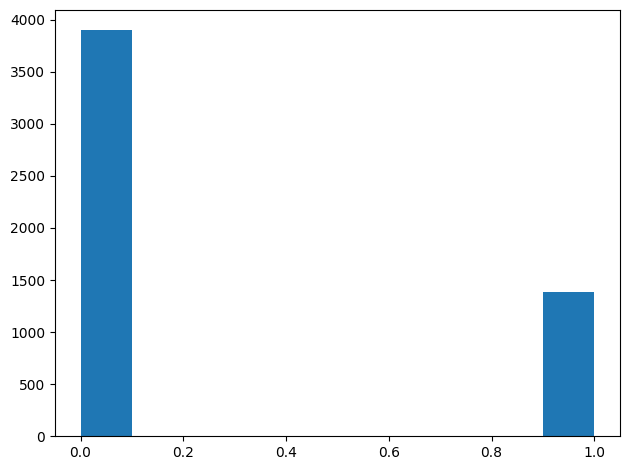

In [22]:
plt.hist(data['Churn'])
plt.tight_layout()
plt.show()

Больше тех, кто остался

In [23]:
import seaborn as sns

In [24]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,Churn,...,HasContractPhone_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No
2954,71,106.75,7283.25,1,0,1,1,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4096,41,19.75,899.45,0,0,0,1,0,1,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
635,59,101.10,6039.90,1,0,0,1,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3104,30,82.05,2570.20,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4967,24,49.70,1167.80,0,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3517,46,33.70,1537.85,0,0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3249,52,25.05,1270.25,1,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
176,14,48.80,664.40,0,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1509,38,60.00,2193.20,0,0,0,1,1,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
469,1,80.80,80.80,0,0,1,1,0,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5]),
 [Text(0, 0.5, 'ClientPeriod'),
  Text(0, 1.5, 'MonthlySpending'),
  Text(0, 2.5, 'TotalSpent'),
  Text(0, 3.5, 'Sex'),
  Text(0, 4.5, 'IsSeniorCitizen'),
  Text(0, 5.5, 'HasPartner'),
  Text(0, 6.5, 'HasChild'),
  Text(0, 7.5, 'HasPhoneService'),
  Text(0, 8.5, 'IsBillingPaperless'),
  Text(0, 9.5, 'Churn'),
  Text(0, 10.5, 'HasOnlineSecurityService_No'),
  Text(0, 11.5, 'HasOnlineSecurityService_Yes'),
  Text(0, 12.5, 'HasOnlineBackup_No'),
  Text(0, 13.5, 'HasOnlineBackup_Yes'),
  Text(0, 14.5, 'HasDeviceProtection_No'),
  Text(0, 15.5, 'HasDeviceProtection_Yes'),
  Text(0, 16.5, 'HasTechSupportAccess_No'),
  Text(0, 17.5, 'HasTechSupportAccess_Yes'),
  Text(0, 18.5, 'HasOnlineTV_No'),
  Text(0, 19.5, 'HasOnlineTV_Yes'),
  Text(0, 20.5, 'HasMovieSub

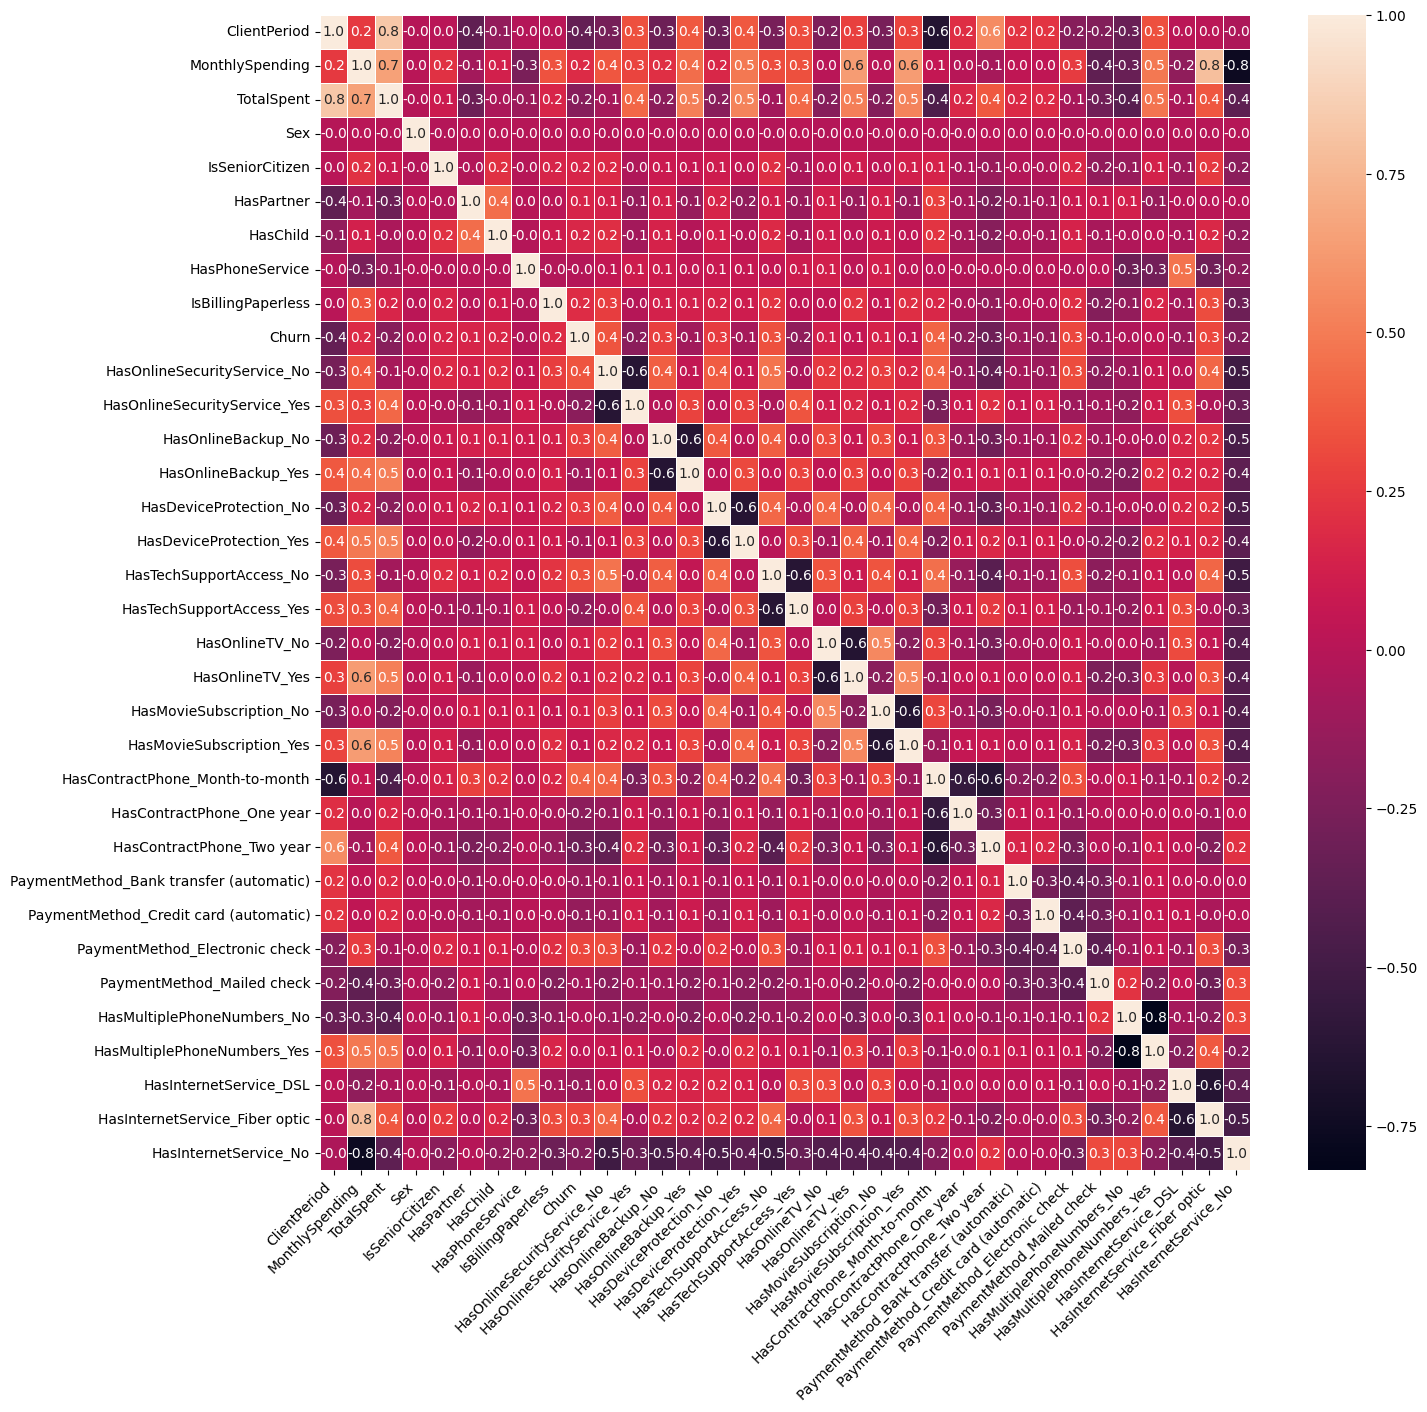

In [25]:
plt.figure(figsize=(15,15))

datacorr = data.corr()
sns.heatmap(datacorr, annot=True, linewidths=0.5, fmt='.1f', annot_kws={'size': 10})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

- Может быть корреляция только столбцов Yes и No, но это вроде норм
- больших корреляций нет

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [26]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
pipeline = make_pipeline(
    # CustomPreprocessor(
    #         binary_columns = binary_columns,
    #         one_hot_columns = one_hot_columns,
    #         drop_columns = drop_columns
    #     ),
    
    StandardScaler(),
    LogisticRegression()
)

param_grid = {
    'logisticregression__C': [100, 20, 10, 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1
)

X = data.drop(columns=['Churn'])
# X = data_origin.drop(columns=['Churn'])
y = data['Churn']
# y = data_origin['Churn']

grid_search.fit(X, y)

model = grid_search.best_estimator_

print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'logisticregression__C': 10} 0.8450593007444084


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество 0.845, параметр 10

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [30]:
import catboost

In [31]:
X_origin = data_origin.drop(columns=['Churn'])

In [32]:
catboost_model = catboost.CatBoostClassifier(
    n_estimators=200,
    silent=True,
    cat_features=cat_cols,
    eval_metric='AUC'
)
catboost_model.grid_search(
    {'l2_leaf_reg': np.linspace(0, 1, 20)},
    X_origin, y,
    plot=True,
    refit=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8710712102
bestIteration = 143

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8710712	best: 0.8710712 (0)	total: 18.7s	remaining: 5m 56s

bestTest = 0.8717017272
bestIteration = 84

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8717017	best: 0.8717017 (1)	total: 37.3s	remaining: 5m 35s

bestTest = 0.8710449387
bestIteration = 144

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8710449	best: 0.8717017 (1)	total: 56.4s	remaining: 5m 19s

bestTest = 0.8717781535
bestIteration = 79

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8717782	best: 0.8717782 (3)	total: 1m 15s	remaining: 5m

best

{'params': {'l2_leaf_reg': 0.3684210526315789},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
   

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Лучший скор - 0.87 на 7й итерации, параметр l2: около 0.37

# Предсказания

In [33]:
best_model = catboost_model

In [35]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col='Id')

# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission['Churn'] = catboost_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.